In [3]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load preprocessed data
df = pd.read_csv('./preprocessed_data/lemmatized_and_misspelled_removed_SEFACED.csv', encoding='utf-8')

# Corpus (lemmatized documents) and target variable
corpus = df['lemmatized_tokens']
y = df['Class_Label']

# Tokenize text
tokenized_corpus = [word_tokenize(text) for text in corpus]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Function to generate document embeddings
def document_embedding(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Generate document embeddings
X_word2vec = np.array([document_embedding(tokens) for tokens in tokenized_corpus])

# Load extra features
df_features = pd.read_csv('./data_with_extra_features/SEFACED_all_f eatures.csv')

# Extract desired columns from extra features
desired_columns = ['html_tag_count', 'css_tag_count', 'spam_phrase_count', 'link_count', 'grammar_error_count', 'misspelled_word_count']
df_desired_features = df_features[desired_columns]

# Ensure both DataFrames have a common index
df_desired_features.index = df.index

# Concatenate Word2Vec embeddings DataFrame with extra features DataFrame
df_word2vec_merged = pd.concat([pd.DataFrame(X_word2vec), df_desired_features], axis=1)

df_word2vec_merged.columns = df_word2vec_merged.columns.astype(str)

# Now, df_word2vec_merged contains both Word2Vec embeddings and extra features
print(df_word2vec_merged)


              0         1         2         3         4         5         6  \
0      0.137118 -0.276411  0.070968 -0.522611  0.333711 -0.236017 -0.584443   
1      0.161371 -0.574124  0.116295 -0.757538  0.326461  0.066632 -0.207100   
2      0.244366 -0.479731  0.301749 -0.834063  0.431032  0.316069 -0.008728   
3      0.005146 -0.355455  0.066565 -0.560106  0.247857 -0.047438 -0.530318   
4      0.095545 -0.260707  0.138648 -0.439602  0.122307  0.015211 -0.500347   
...         ...       ...       ...       ...       ...       ...       ...   
17110 -0.154881 -0.319138  0.114147 -0.589121  0.144802  0.217531 -0.406847   
17111 -0.082702 -0.131714  0.090304 -0.584384  0.239448 -0.017017 -0.391805   
17112  0.129203 -0.322557  0.205773 -0.515845  0.242236 -0.010483 -0.322246   
17113 -0.083709 -0.066975 -0.030985 -0.625527  0.259503 -0.108264 -0.315205   
17114 -0.130430 -0.102093  0.045200 -0.567541  0.281960 -0.167376 -0.392550   

              7         8         9  ...        96 

In [5]:

df_word2vec_merged.to_csv("with_word2Vec.csv")


In [4]:
from sklearn.model_selection import train_test_split

# Veri kümesini eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(df_word2vec_merged, y, test_size=0.2, random_state=42)


Logistic Regression Classifier:
Accuracy: 0.9611451942740287
Precision: 0.9702162382700938
Recall: 0.9753896636587367
F1 Score: 0.9727960728165269


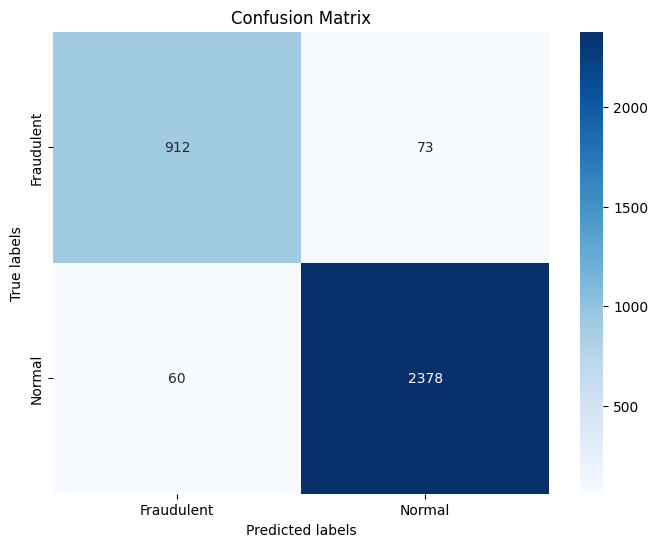

In [18]:

# LR
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
lr_predictions = lr_model.predict(X_test)

# Modeli değerlendirin

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, pos_label='Normal')
lr_recall = recall_score(y_test, lr_predictions, pos_label='Normal')
lr_f1_score = f1_score(y_test, lr_predictions, pos_label='Normal')

print("Logistic Regression Classifier:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print("F1 Score:", lr_f1_score)
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, lr_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Random Forest Classifier:
Accuracy: 0.988314344142565
Precision: 0.9877949552481693
Recall: 0.9958982772764561
F1 Score: 0.991830065359477


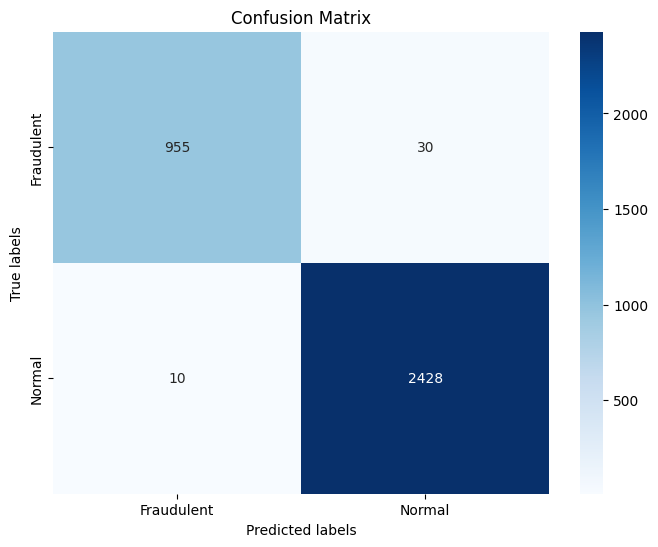

In [20]:
#RF

from sklearn.ensemble import RandomForestClassifier

# Rastgele Orman modelini başlatın
rf_model = RandomForestClassifier()

# Rastgele Orman modelini eğitin
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
rf_predictions = rf_model.predict(X_test)

# Modeli değerlendirin

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label='Normal')
rf_recall = recall_score(y_test, rf_predictions, pos_label='Normal')
rf_f1_score = f1_score(y_test, rf_predictions, pos_label='Normal')


print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print("F1 Score:", rf_f1_score)

# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, rf_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Naive Bayes Classifier:
Accuracy: 0.8442886356996786
Precision: 0.9644076060458313
Recall: 0.8113207547169812
F1-score: 0.88126531521497


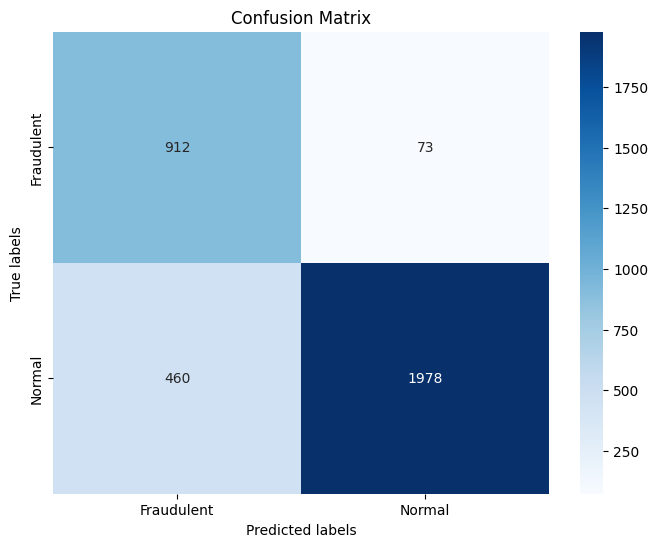

In [21]:
#NB

from sklearn.naive_bayes import GaussianNB

# Çoklu Naive Bayes modelini başlatın
nb_model = GaussianNB()

# Çoklu Naive Bayes modelini eğitin
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
nb_predictions = nb_model.predict(X_test)

# Modeli değerlendirin

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label='Normal')
nb_recall = recall_score(y_test, nb_predictions, pos_label='Normal')
nb_f1_score = f1_score(y_test, nb_predictions, pos_label='Normal')


print("Naive Bayes Classifier:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1_score}")
# print("Sınıflandırma Raporu:")
# print(classification_report(y_test, nb_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


c:\Users\havvanur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\havvanur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine Classifier (LinearSVC):
Accuracy: 0.9620216184633362
Precision: 0.9725634725634725
Recall: 0.9741591468416735
f1_score: 0.9733606557377048


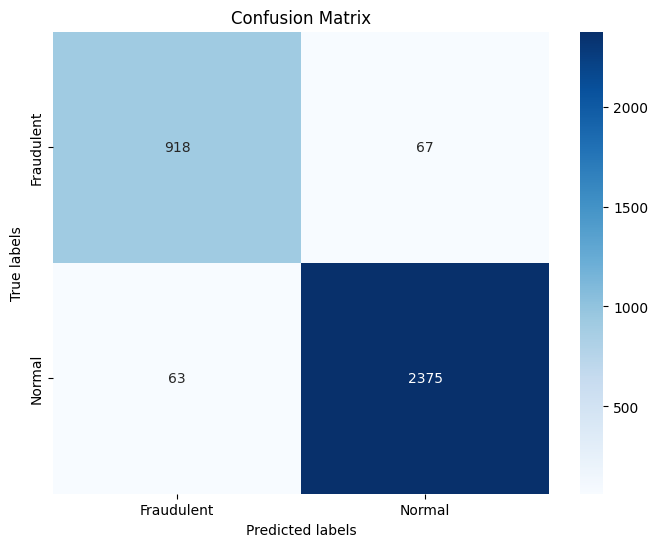

In [5]:
#SVM

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


svm_model = LinearSVC(max_iter=1000000, random_state=42)

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, pos_label='Normal')
svm_recall = recall_score(y_test, svm_predictions, pos_label='Normal')
svm_f1_score = f1_score(y_test, svm_predictions, pos_label='Normal')

print("Support Vector Machine Classifier (LinearSVC):")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"f1_score: {svm_f1_score}")

# print("Classification Report:")
# print(classification_report(y_test, svm_predictions))

cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




(17115, 107)
(17115, 1)
Normal


C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                1080      
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 1,212
Trainable params: 1,212
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
2739/2739 - 14s - loss: 4.5789 - accuracy: 0.7856 - 14s/epoch - 5ms/step
Epoch 2/200
2739/2739 - 15s - loss: 0.9526 - accuracy: 0.8909 - 15s/epoch - 5ms/step
Epoch 3/200
2739/2739 - 16s - loss: 0.6496 - accuracy: 0.9201 - 16s/epoch - 6ms/step
Epoch 4/200
2739/2739 - 13s

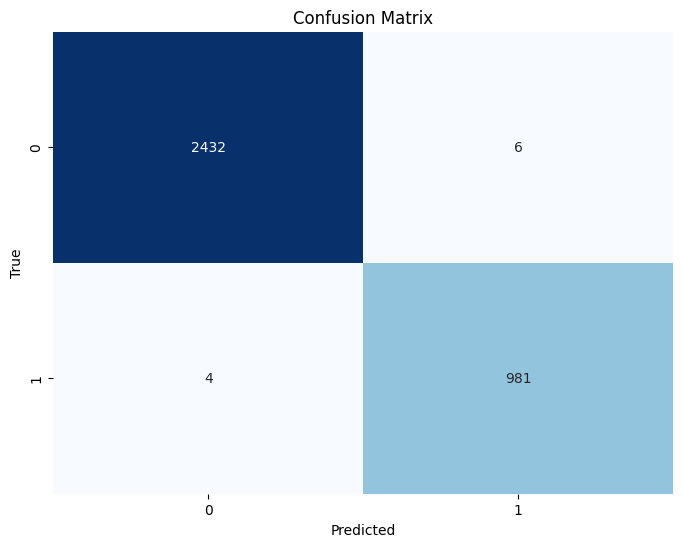

In [2]:

# LSTM

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./with_word2Vec.csv")
x = df.values

y_ = pd.read_csv("./with_bow_labels.csv")
print(x.shape)
print(y_.shape)

print(y_["Class_Label"].iloc[2])

y = []
i = 0
while i < 17115 :
        if y_["Class_Label"].iloc[i] == "Normal":
                y.append(0)
        else:
                y.append(1)
        i += 1

y = np.array(y)
y_ = y.reshape(-1, 1)



# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(107,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(2, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)
y_pred = model.predict(test_x)

y_pred_classes = np.argmax(y_pred, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

lstm_accuracy = accuracy_score(test_y_classes, y_pred_classes )
lstm_precision = precision_score(test_y_classes, y_pred_classes )
lstm_recall = recall_score(test_y_classes, y_pred_classes )
lstm_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {lstm_accuracy}")
print(f"Precision: {lstm_precision}")
print(f"Recall: {lstm_recall}")
print(f"F1-score: {lstm_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\orange\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 105, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 52, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 32)            6176      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)       

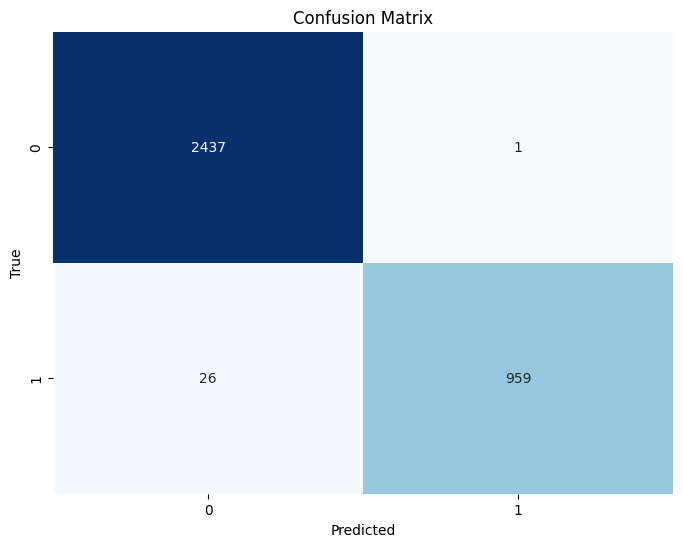

In [4]:
# CNN


import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

df = pd.read_csv("./with_word2Vec.csv")
x = df.values

y_ = pd.read_csv("./with_bow_labels.csv")

y = []
for label in y_["Class_Label"]:
    if label == "Normal":
        y.append(0)
    else:
        y.append(1)

y = np.array(y)
y_ = y.reshape(-1, 1)

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

# Reshape input data for CNN (samples, features, channels)
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)

# Build the CNN model
model = Sequential()

model.add(Conv1D(64, 3, activation='relu', input_shape=(107, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=32, epochs=10)
y_pred = model.predict(test_x)

y_pred_classes = np.argmax(y_pred, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

cnn_accuracy = accuracy_score(test_y_classes, y_pred_classes )
cnn_precision = precision_score(test_y_classes, y_pred_classes )
cnn_recall = recall_score(test_y_classes, y_pred_classes )
cnn_f1_score = f1_score(test_y_classes, y_pred_classes )



print(f"Accuracy: {cnn_accuracy}")
print(f"Precision: {cnn_precision}")
print(f"Recall: {cnn_recall}")
print(f"F1-score: {cnn_f1_score}")

# Compute confusion matrix
cm = confusion_matrix(test_y_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
